<img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto; border:0px solid red;" width=50% height='250'/>

<p style="background-color:romance; color:plum; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bold; font-size:220%; line-height:1.4; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1" style="display:block; margin:auto; border:1px solid LightGrey;" width=75% height='250'/>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bolder; font-size:3em; line-height:1.4; text-transform:capitalize;"><strong>Concrete Slump Test Regression</strong></p>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:normal; font-size:2em; line-height:1.4; text-transform:capitalize;">Regression problems with EDA</p> 

<basefont size="2" face ="arial, verdana, sans-serif" color="jaguar">

**WELCOME!**

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

- The concrete slump test measures the consistency of fresh concrete before it sets. 
- It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. 
- It can also be used as an indicator of an improperly mixed batch.


- **Input variables(9)**: 
  - (component kg in one M^3 concrete)(7):
    * Cement
    * Slag
    * Fly ash
    * Water
    * SP
    * Coarse Aggr.
    * Fine Aggr.
  - (Measurements)(2)
    * SLUMP (cm)
    * FLOW (cm)
    
    
- **Target variable (1)**:
  * 28-day Compressive Strength (Mpa)

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# 1. Import Libraries, Load Dataset, Exploring Data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
# MatplotLib Global Settings
params = {
'figure.figsize':(12, 5),
'figure.titlesize':18,
'font.size': 12,
'axes.titlesize': 18,
'axes.labelsize': 12,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'legend.fontsize': 12,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'h',
'boxplot.meanprops.markeredgecolor': 'gold',
'boxplot.meanprops.markerfacecolor': 'gold',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'k',
'boxplot.medianprops.linewidth': 2.0,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
random_state = seed = 101
test_size = 0.2

# Loading data

In [4]:
df_origin = pd.read_csv('./cement_slump.csv')
df = df_origin
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


# EDA and Graphical analysis

## Multicolinarity Check Colorized Correlation

In [7]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [8]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (2, 2)


,SLUMP(cm),FLOW(cm)
SLUMP(cm),nan,0.906135
FLOW(cm),0.906135,nan


## Correlation between independent variable and dependent variable

In [9]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(key=abs, ascending=False)

Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445656
Fly ash                               0.444380
Slag                                 -0.331522
Water                                -0.254320
SLUMP(cm)                            -0.223499
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
FLOW(cm)                             -0.124189
SP                                   -0.037909
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

### Heatmap

<AxesSubplot:>

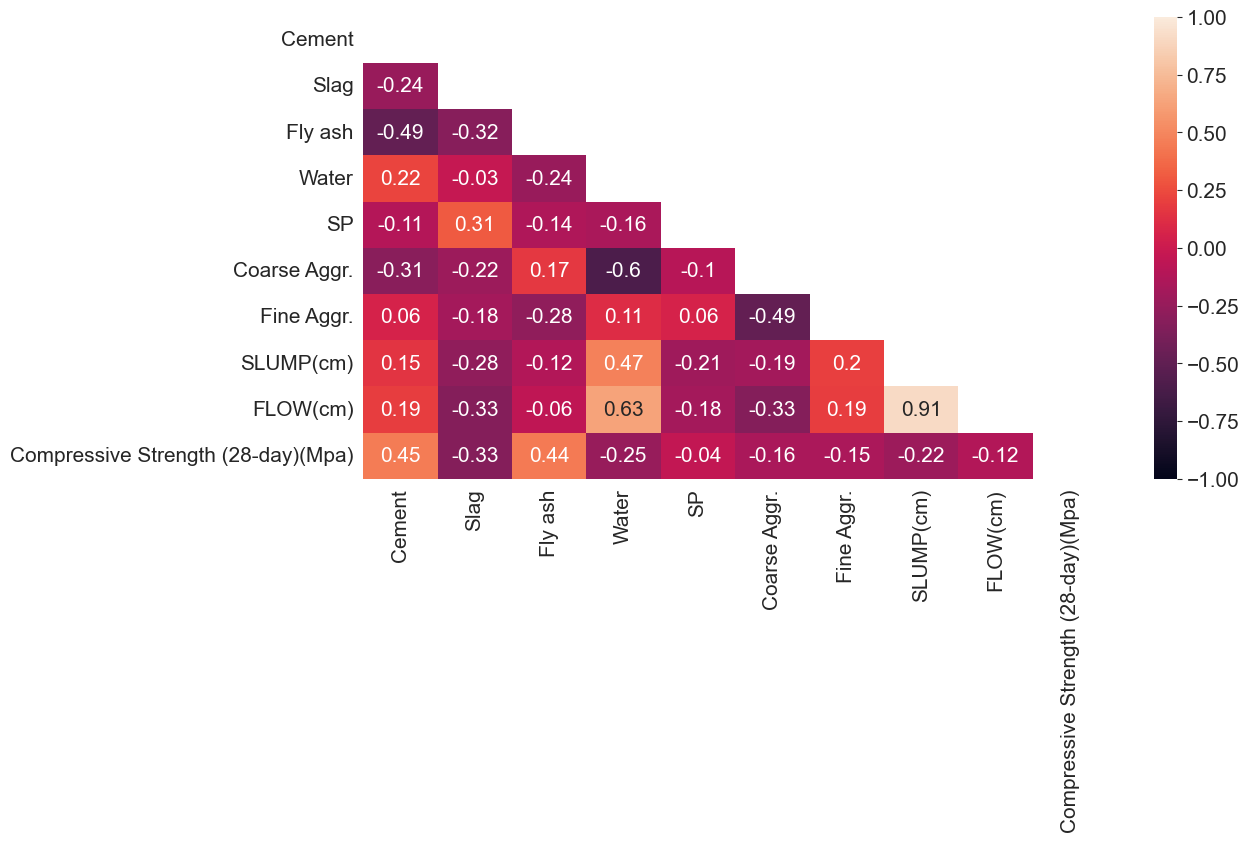

In [10]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)

<AxesSubplot:>

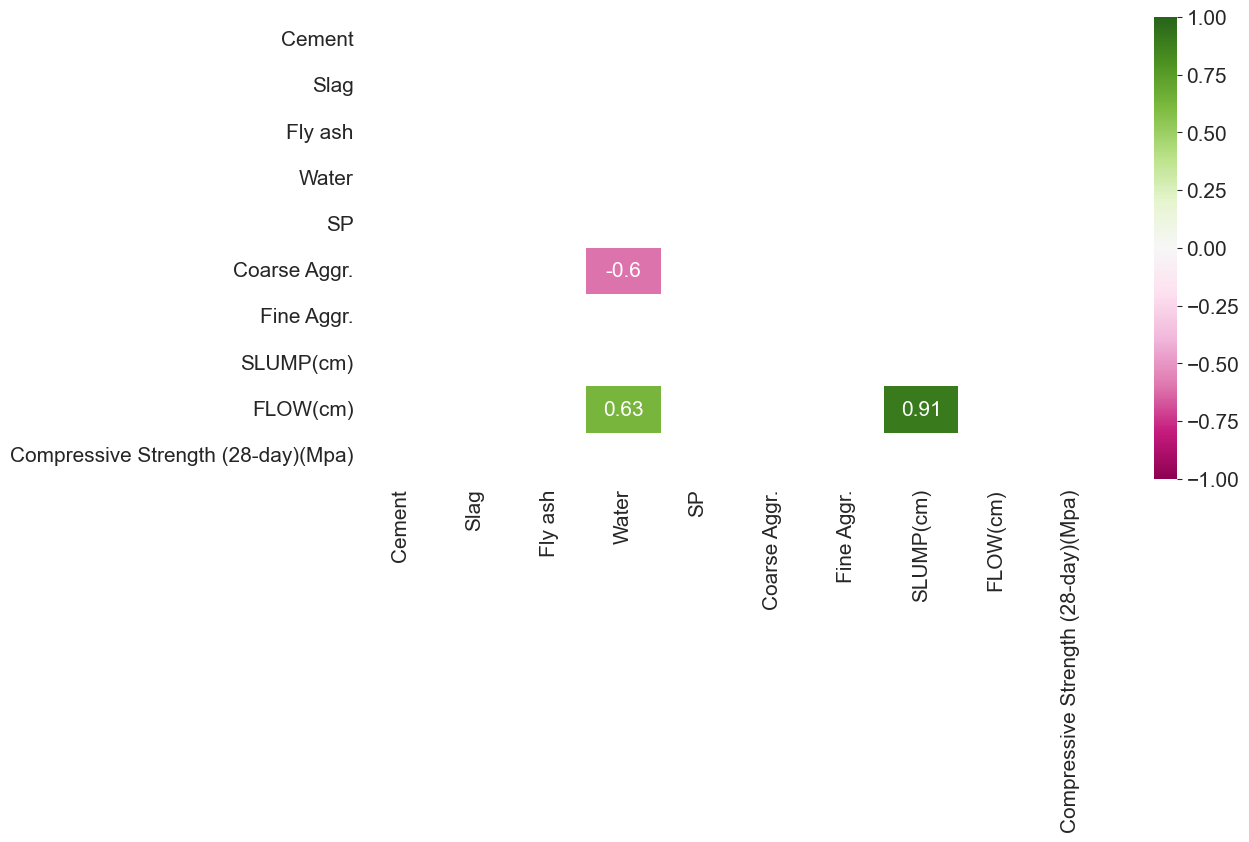

In [11]:
df_corr = df.corr()
filteredDf = df_corr[(abs(df_corr) >=.6) & (abs(df_corr)!=1)]
sns.heatmap(
    filteredDf, 
    mask=np.triu(np.ones_like(df_corr, dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
)

In [12]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(5)

Corr
Cement       Cement        1.000000
SLUMP(cm)    FLOW(cm)      0.906135
Water        FLOW(cm)      0.632026
             Coarse Aggr. -0.602201
Coarse Aggr. Fine Aggr.   -0.488537

## Pairplot - Distribution of Features

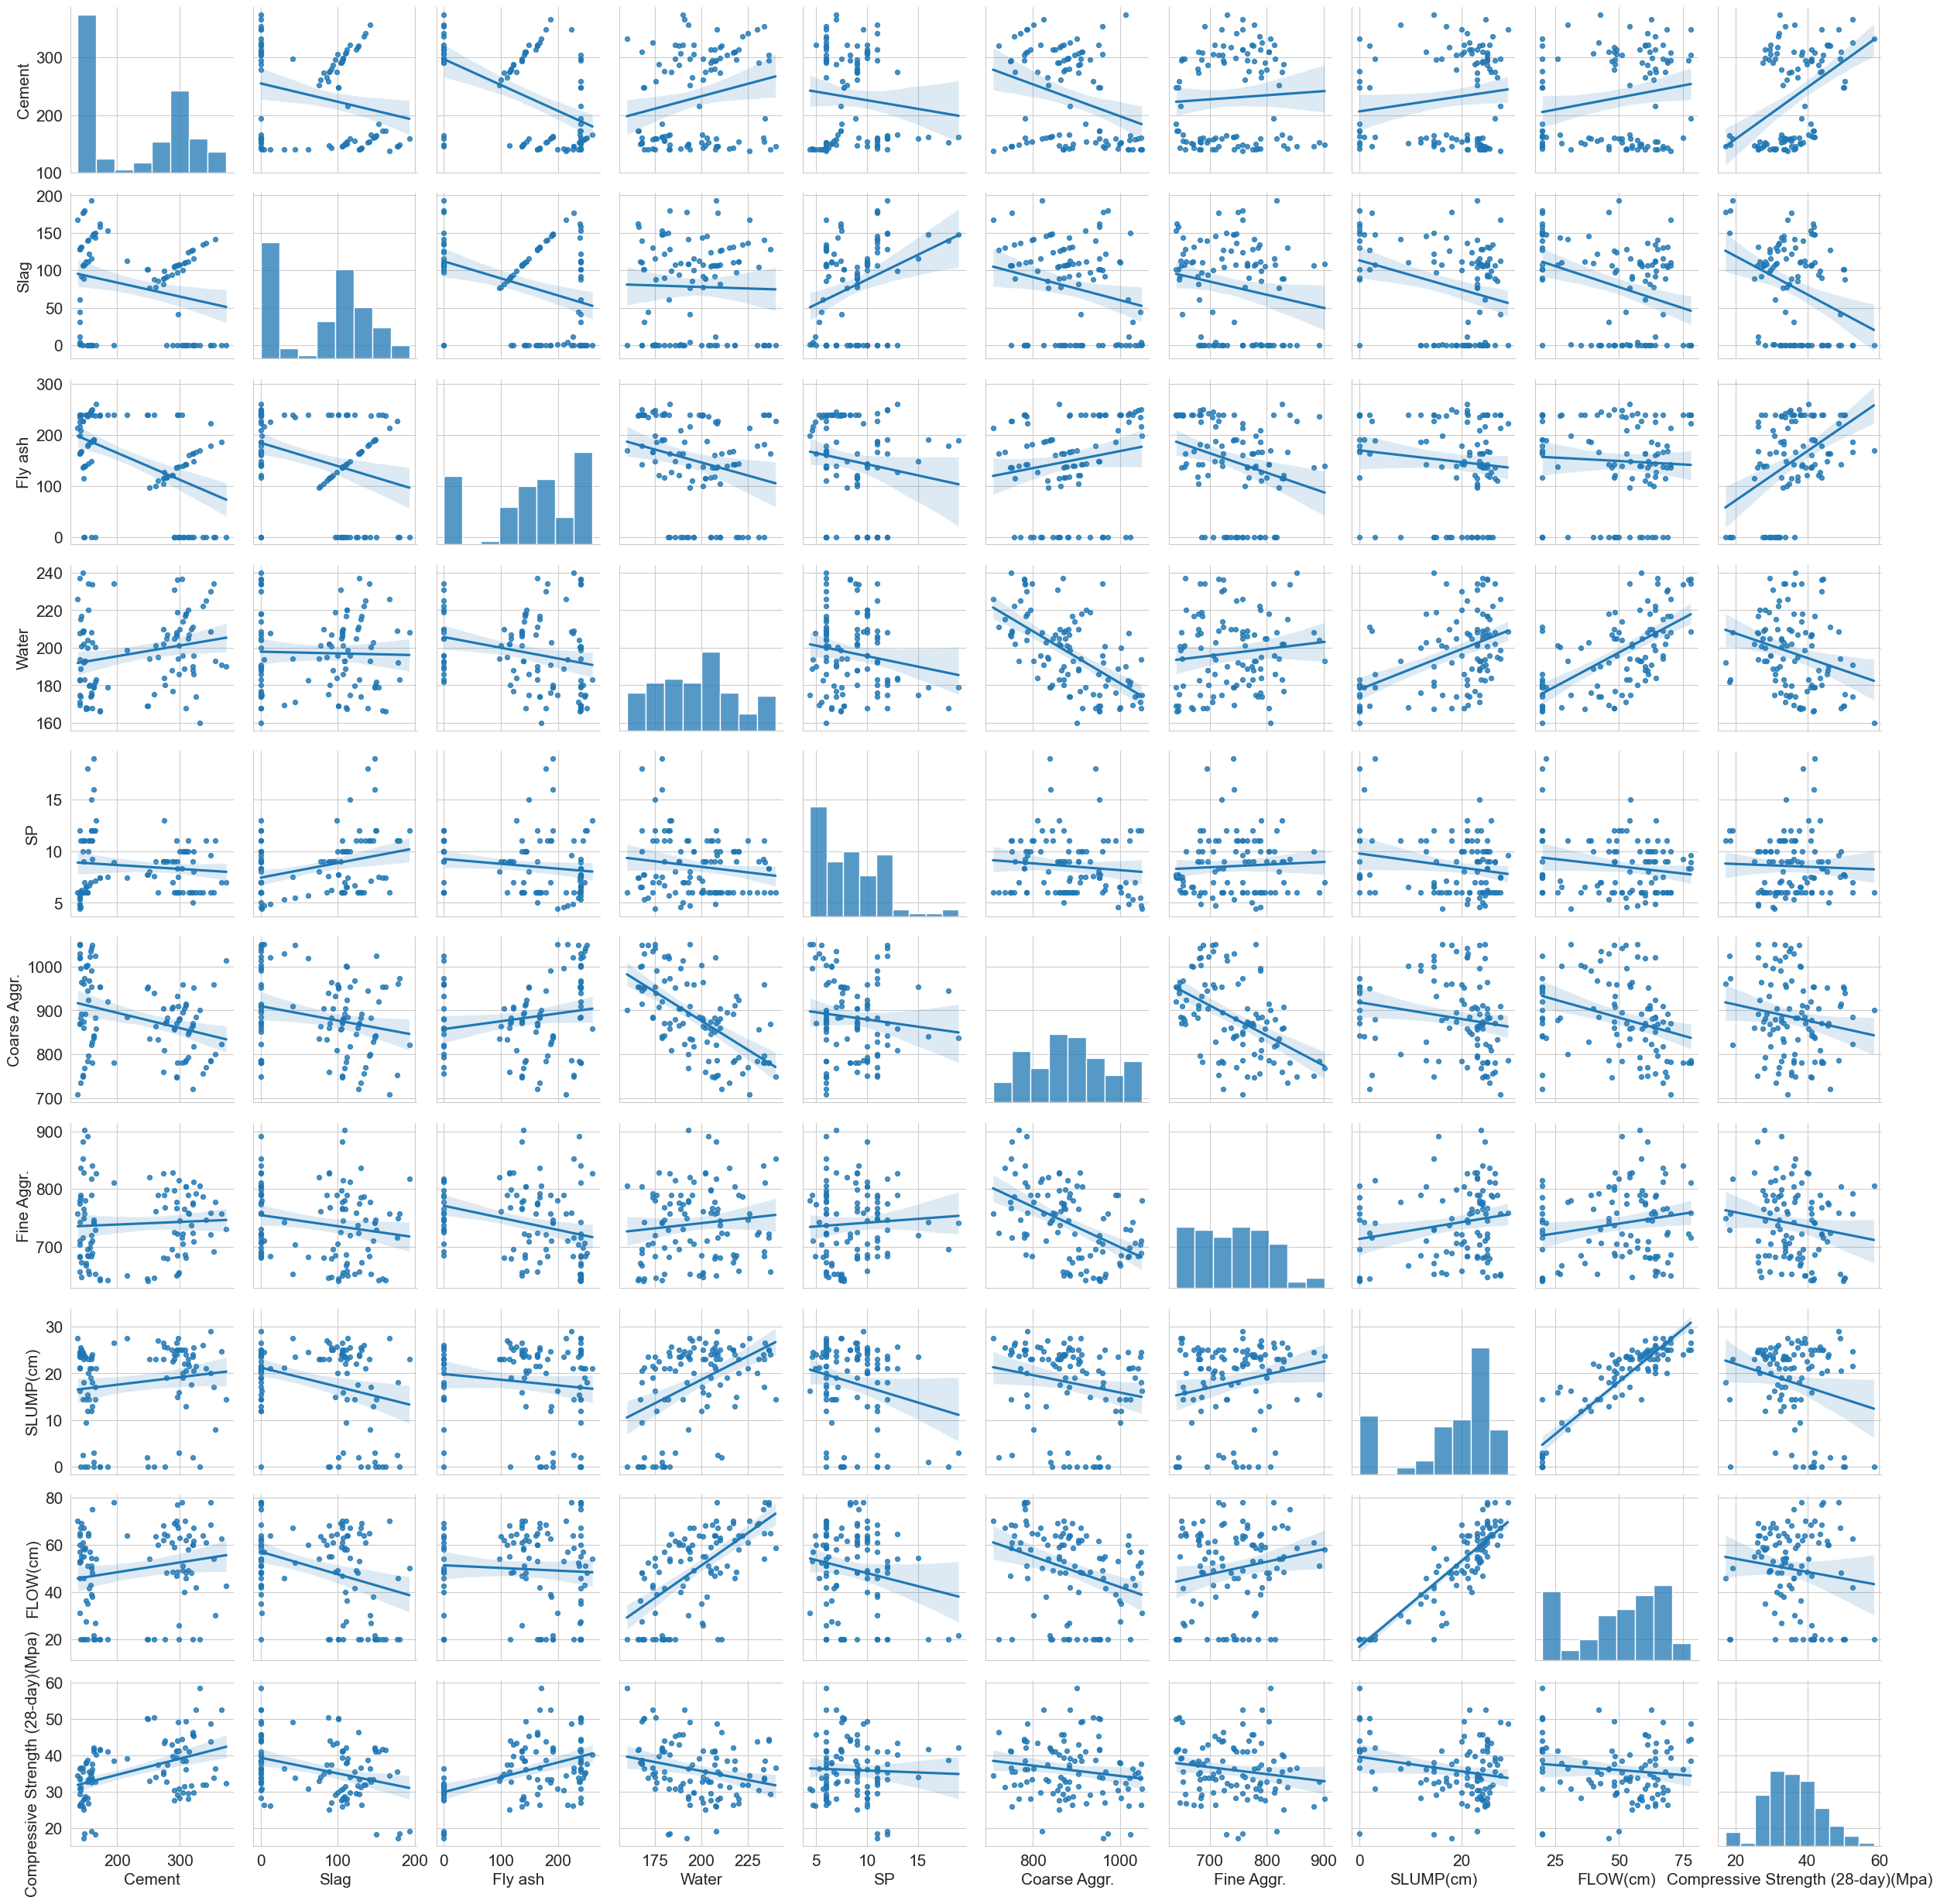

In [13]:
sns.pairplot(df, kind='reg', plot_kws={'scatter_kws':{'s':18}})

### Boxplot

<AxesSubplot:>

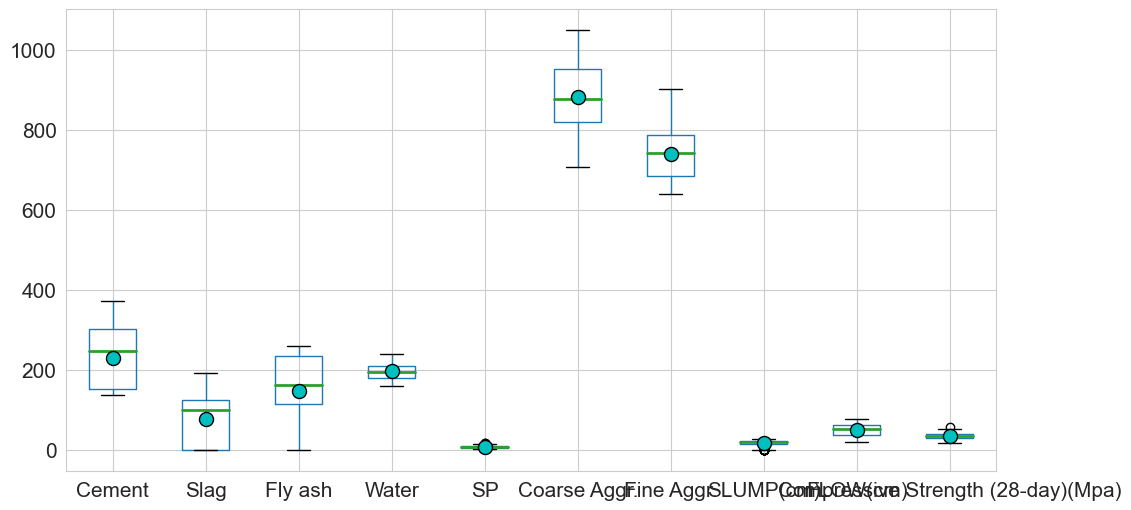

In [14]:
df.boxplot()

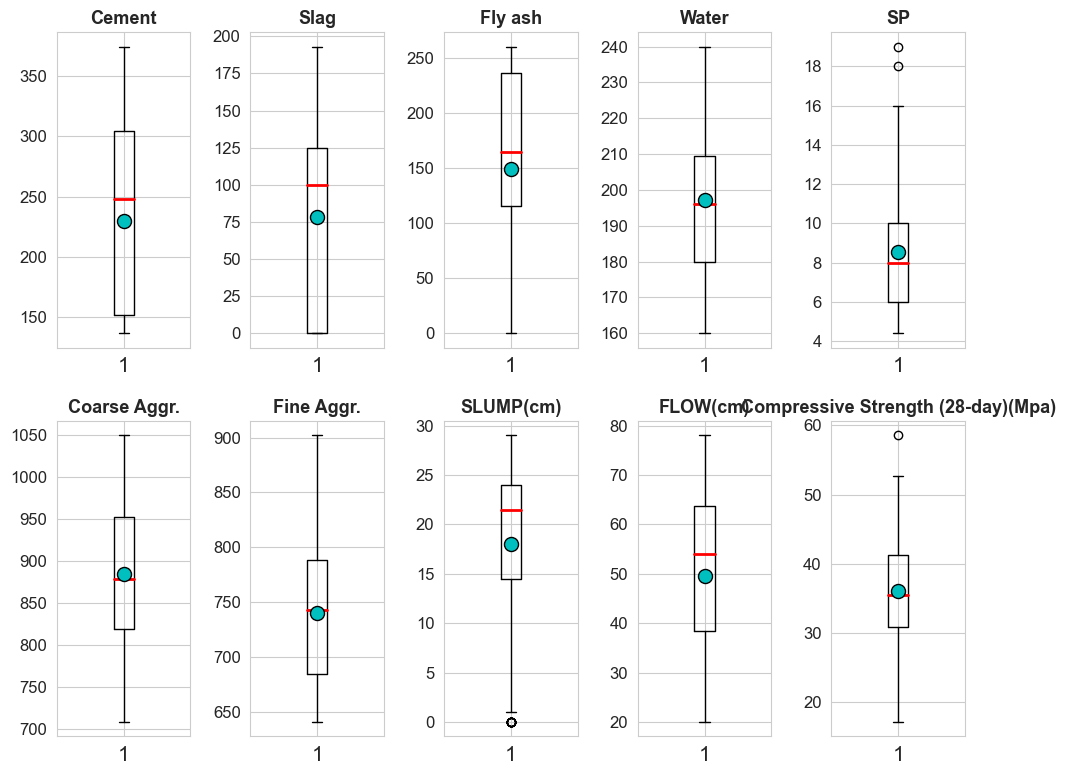

In [15]:
numbers = df.select_dtypes(include='number').columns

fig = plt.figure(figsize=(10, 8))
for i, col in enumerate(numbers):
    plt.subplot(int(np.ceil(len(numbers)/5)), 5, i+1)
    plt.boxplot(df[col])
    plt.gca().set_title(col, fontsize=13, fontweight='bold')
    plt.gca().tick_params(axis='y', labelsize=12)
    plt.tight_layout()

## Check Target Feature

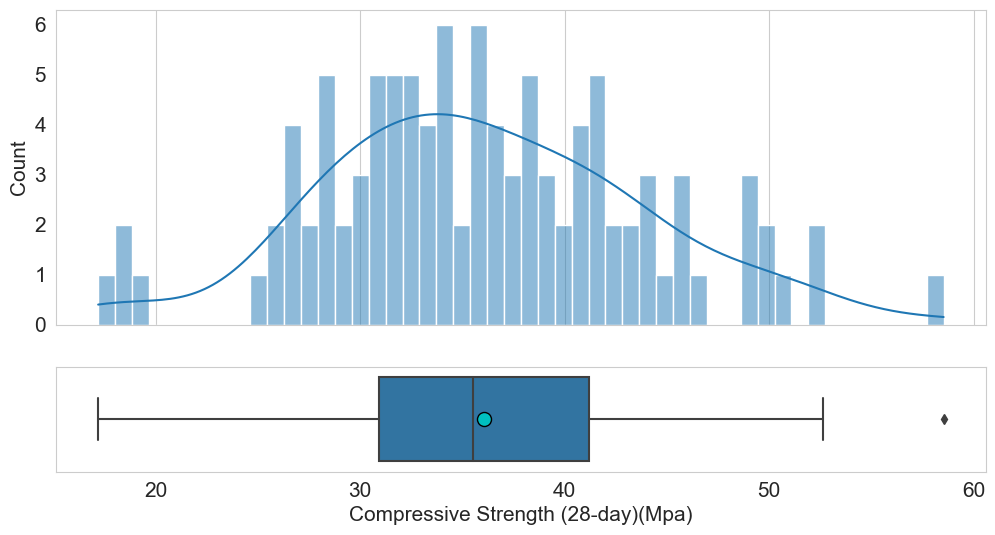

In [16]:
fig, (hist, box) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(df['Compressive Strength (28-day)(Mpa)'], bins=50, kde=True, ax=hist).grid(axis='y')
sns.boxplot(df['Compressive Strength (28-day)(Mpa)'], ax=box).grid(axis='x')

# Data Preprocessing 

## Import Libraries

In [17]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# Supervised-Regression-metrics
# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

# UnSupervised
from sklearn.cluster import KMeans
# import sklearn sklearn.metrics.SCORERS.keys()
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle

In [18]:
# conda install -c districtdatalabs yellowbrick
# yellowbrick library for visualizing the model performance
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Supervised-Regression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

# Supervised-Classifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# UnSupervised-Cluster
from yellowbrick.cluster import KElbowVisualizer 

# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

## Features and Target variable
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [19]:
X = df.drop(columns='Compressive Strength (28-day)(Mpa)')
y = df['Compressive Strength (28-day)(Mpa)']

## Train & Test
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state) 

## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [23]:
# will be used in pipeline later
scaler = StandardScaler() 

In [24]:
# Use train - calc mean and sd
# if you don't use pipeline, you can use scaler directly
scaler.fit(X_train)

StandardScaler()

In [25]:
# Use scaler calc scaled data
X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

In [26]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,82.0,-3.520219e-17,1.006154,-1.180229,-0.990318,0.020010,0.933483,1.820369
Slag,82.0,3.791005e-17,1.006154,-1.297210,-1.295158,0.360864,0.800008,1.871189
Fly ash,82.0,1.543481e-16,1.006154,-1.649362,-0.376828,0.208311,1.037447,1.191117
Water,82.0,-6.539484e-16,1.006154,-1.781644,-0.839996,-0.094016,0.566361,2.131697
SP,82.0,5.483419e-17,1.006154,-1.423970,-0.874324,-0.290324,0.499793,3.591555
Coarse Aggr.,82.0,4.305499e-16,1.006154,-2.054253,-0.707824,-0.084425,0.737949,1.838719
Fine Aggr.,82.0,2.504771e-16,1.006154,-1.582879,-0.880831,0.088205,0.721495,2.621368
SLUMP(cm),82.0,-5.686508e-17,1.006154,-1.960431,-0.348988,0.415058,0.706785,1.262455
FLOW(cm),82.0,-3.520219e-17,1.006154,-1.591123,-0.918211,0.189291,0.836969,1.661287


In [27]:
# # check X_test_scaled
# pd.DataFrame(X_test_scaled, columns=X.columns).describe().T

### Checking Scaled Data - std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.

In [28]:
def check_scaled_data(train, test, columns=X.columns, agg=["mean", "std", min, max]):
    #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe
    train = pd.DataFrame(train, columns=columns).agg(agg) 
    test = pd.DataFrame(test, columns=columns).agg(agg)
    return pd.concat([train, test], keys=["train", "test"]).T

In [29]:
check_scaled_data(X_train_scaled, X_test_scaled).head().round()

train                test               
         mean  std  min  max mean  std  min  max
Cement   -0.0  1.0 -1.0  2.0 -0.0  1.0 -1.0  2.0
Slag      0.0  1.0 -1.0  2.0 -0.0  1.0 -1.0  2.0
Fly ash   0.0  1.0 -2.0  1.0  0.0  1.0 -2.0  1.0
Water    -0.0  1.0 -2.0  2.0  0.0  1.0 -1.0  2.0
SP        0.0  1.0 -1.0  4.0 -0.0  1.0 -1.0  2.0

#  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_pred_train, y_test, y_pred_test, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_pred_train),
    "mae" : mean_absolute_error(y_train, y_pred_train),
    "mse" : mean_squared_error(y_train, y_pred_train),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_pred_train))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred_test),
    "mae" : mean_absolute_error(y_test, y_pred_test),
    "mse" : mean_squared_error(y_test, y_pred_test),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred_test))}}
    
    return pd.DataFrame(scores)

# same train_val function
def eval_metric_regression(model, X_train, y_train, X_test, y_test, model_name=''):   
    y_pred_test_test = model.predict(X_test) 
    y_pred_train = model.predict(X_train)  
    
    train = pd.Series({
            "R2"   : r2_score(y_train, y_pred_train),
            "MAE"  : mean_absolute_error(y_train, y_pred_train),
            "MSE"  : mean_squared_error(y_train, y_pred_train),                          
            "RMSE" : np.sqrt(mean_squared_error(y_train, y_pred_train))}).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
            "R2"   : r2_score(y_test, y_pred_test_test),
            "MAE"  : mean_absolute_error(y_test, y_pred_test_test),
            "MSE"  : mean_squared_error(y_test, y_pred_test_test),
            "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_test_test))}, orient='index', columns=[model_name+"_test"])

    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    
#     # join (left join by default)
#     scores2 = train.join(test)
#     # concat (outer join by default)
#     scores3 = pd.concat([train, test], axis=1)
#     # append not recommended - use concat
#     scores4 = train.append(test)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

## Linear Model Fitting and Predicting `without Scale and without Pipeline`

In [31]:
from sklearn.linear_model import LinearRegression

# will be used in pipeline later
lin_model = LinearRegression() 

lin_model.fit(X_train, y_train)

LinearRegression()

### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [32]:
ls = eval_metric_regression(lin_model, X_train, y_train, X_test, y_test, "linear")
ls

0          linear            
     linear_train linear_test
R2       0.907145    0.911967
MAE      1.936263    1.740383
MSE      5.874313    4.454237
RMSE     2.423698    2.110506

In [33]:
y_pred_test = lin_model.predict(X_test)
y_pred_train = lin_model.predict(X_train)

In [34]:
# Evaluate the result. Overfitting?
ls = train_val(y_train, y_pred_train, y_test, y_pred_test, "linear")
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


### Linear Model Cross Validation - Data not Scaled X_train or Scaled X_train_scaled

In [35]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

In [36]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    cv = 5
)
df_scores_lm = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lm

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.006999,0.003998,0.942208,-1.908524,-4.645188,-2.155270
1,0.004431,0.004497,0.706629,-2.647319,-10.756658,-3.279734
2,0.005845,0.003000,0.865934,-1.482831,-3.725762,-1.930223
3,0.003000,0.004001,0.923166,-2.244108,-8.434009,-2.904137
4,0.005000,0.003006,0.792889,-2.867905,-11.698265,-3.420273


In [37]:
df_scores_lm.iloc[:, 2:].mean()

test_r2                             0.846165
test_neg_mean_absolute_error       -2.230137
test_neg_mean_squared_error        -7.851977
test_neg_root_mean_squared_error   -2.737927
dtype: float64

In [38]:
# check error
2.423698/y.mean()

0.06725257718905493

#### Adjusted R2 Score

In [39]:
def adj_r2(y_test, y_pred_test, X):
    r2 = r2_score(y_test, y_pred_test)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [40]:
y_pred_adj = lin_model.predict(X_test)
adj_r2(y_test, y_pred_adj, X)

0.9034474275822459

#### RMSE check Cross Validation 

In [41]:
 def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])  

In [42]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, y_pred_train)), 
    df_scores_lm['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),0.067253
CV RMSE percent(%),-0.075972


### Coefficient - Slope Calculate 

In [43]:
def get_coeff_intercept(coeff, intercept, model_name='', columns=X_train.columns):
    coefficients = pd.DataFrame(coeff, columns = [f'Coefficient_{model_name}'], index=columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [44]:
# Calc Slope
lm_df = get_coeff_intercept(
    lin_model.coef_, 
    lin_model.intercept_,
    model_name='linear',
)
lm_df

,Coefficient_linear
Cement,0.054190
Slag,-0.036492
Fly ash,0.044675
Water,-0.233374
SP,0.041601
Coarse Aggr.,-0.060089
Fine Aggr.,-0.041999
SLUMP(cm),-0.243203
FLOW(cm),0.082191
intercept,149.990175


### **Result:________**

- next step Regularization

## Calc Residuals and Compare Actual and Predicted Labels 

### Calculate Manual Actual and Predicted Labels 

In [45]:
y_pred_test = lin_model.predict(X_test)
y_pred_train = lin_model.predict(X_train)

In [46]:
def check_pred_data_describe(y_pred_test, y_pred_train):
    test = pd.DataFrame(y_pred_test, columns=['y_pred_test']).describe().T
    train = pd.DataFrame(y_pred_train, columns=['y_pred_train']).describe().T
    return pd.concat([test, train])

In [47]:
check_pred_data_describe(y_pred_test, y_pred_train)

,count,mean,std,min,25%,50%,75%,max
y_pred_test,21.0,37.133398,6.736897,27.05403,30.864899,37.358593,42.560118,49.008115
y_pred_train,82.0,35.847195,7.622170,17.25653,30.601279,35.967594,40.493695,52.198352


In [48]:
pd.concat([y_test, y_train], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Compressive Strength (28-day)(Mpa),21.0,36.786667,7.288833,26.02,31.37,35.52,43.0100,50.50
Compressive Strength (28-day)(Mpa),82.0,35.847195,8.002769,17.19,30.53,35.79,41.1075,58.53


In [49]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred_test, "Residual":y_test-y_pred_test})
df_comparing.head()

,Actual,Prediction,Residual
30,45.82,44.888792,0.931208
67,40.34,41.416085,-1.076085
62,28.29,28.566116,-0.276116
47,43.01,39.400108,3.609892
42,33.51,35.142947,-1.632947


In [50]:
# check Residual
df_comparing.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,21.0,36.786667,7.288833,26.020000,31.370000,35.520000,43.010000,50.500000
Prediction,21.0,37.133398,6.736897,27.054030,30.864899,37.358593,42.560118,49.008115
Residual,21.0,-0.346732,2.133240,-3.371969,-1.838593,-0.480118,0.905101,4.625770


In [51]:
lm_df

,Coefficient_linear
Cement,0.054190
Slag,-0.036492
Fly ash,0.044675
Water,-0.233374
SP,0.041601
Coarse Aggr.,-0.060089
Fine Aggr.,-0.041999
SLUMP(cm),-0.243203
FLOW(cm),0.082191
intercept,149.990175


In [52]:
# Sample Data - test first row
X_test.loc[30]

Cement          321.0
Slag              0.0
Fly ash         164.0
Water           190.0
SP                5.0
Coarse Aggr.    870.0
Fine Aggr.      774.0
SLUMP(cm)        24.0
FLOW(cm)         60.0
Name: 30, dtype: float64

In [53]:
# y_pred_test = slope*X + intercept
# y_pred_test = b1*X + b0

In [54]:
lin_model.coef_*X_test.loc[30]

Cement          17.394970
Slag            -0.000000
Fly ash          7.326745
Water          -44.341051
SP               0.208006
Coarse Aggr.   -52.277209
Fine Aggr.     -32.507426
SLUMP(cm)       -5.836878
FLOW(cm)         4.931460
Name: 30, dtype: float64

In [55]:
# Calc Prediction vs Actual
y_test.loc[30], sum(lin_model.coef_*X_test.loc[30]) + lin_model.intercept_

(45.82, 44.88879166778861)

In [56]:
df_comparing.sort_values(by='Residual', key=abs, ascending=False).head()

,Actual,Prediction,Residual
18,49.30,44.674230,4.625770
47,43.01,39.400108,3.609892
40,35.66,39.031969,-3.371969
33,35.52,38.764309,-3.244309
31,43.95,46.743147,-2.793147


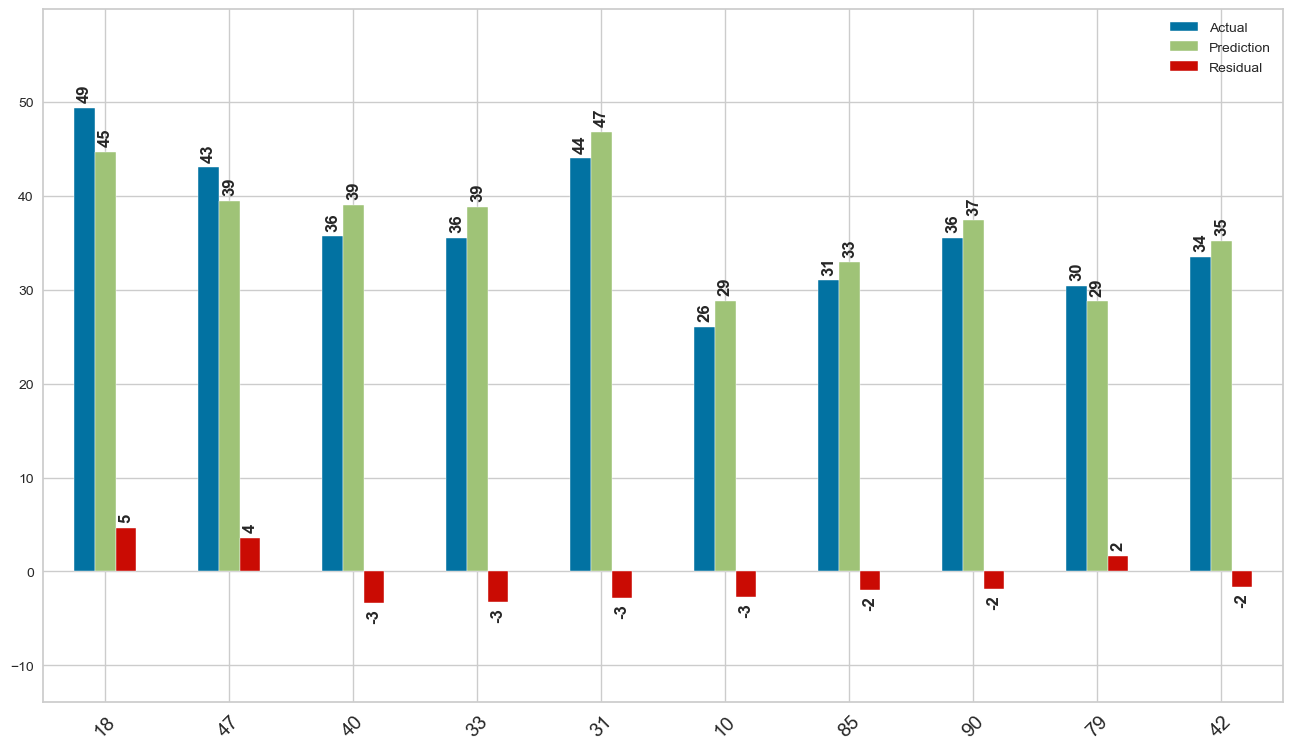

In [57]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.0f', fontsize=12, weight='bold', rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=45, labelsize=14)

### Check Residuals - ResidualsPlot

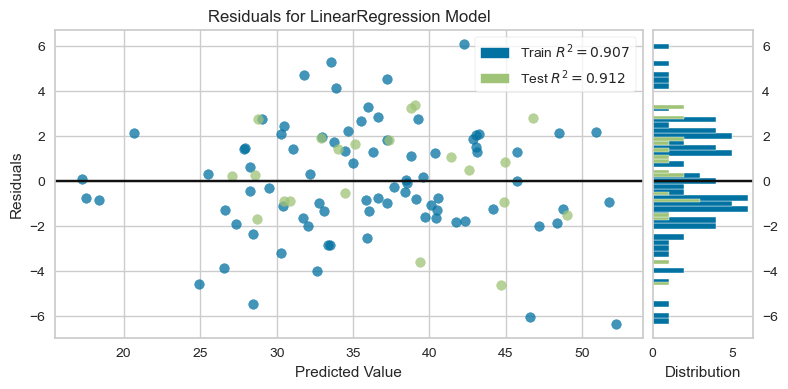

In [58]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(900, 400))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

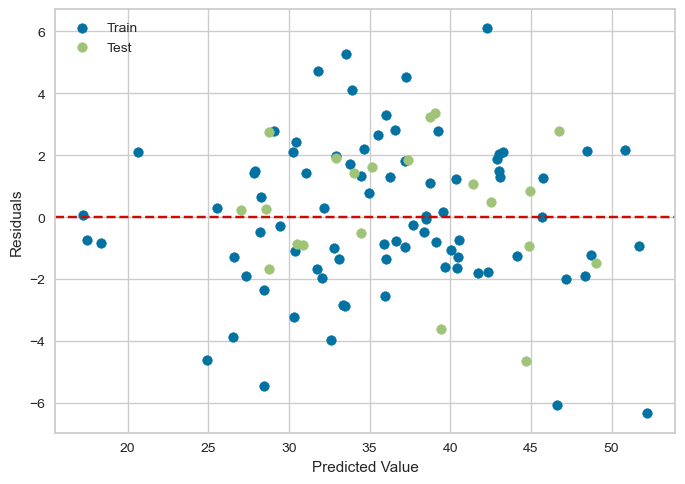

In [59]:
# Residuals scatterplot 
plt.scatter(x=y_pred_train, y=-(y_train-y_pred_train), c='b', label='Train') 
plt.scatter(x=y_pred_test, y=-(y_test-y_pred_test), c='g', label='Test') 

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

### Check Residuals - Scatterplot

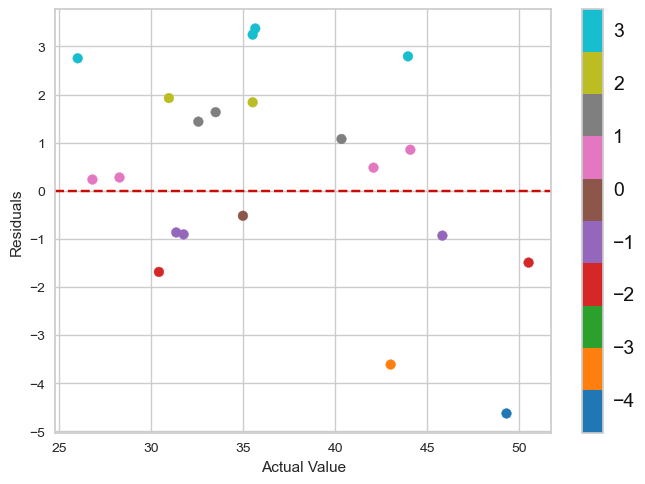

In [60]:
# Residuals scatterplot
plt.scatter(x=y_test, y=-(y_test-y_pred_test), c=-(y_test-y_pred_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel('Actual Value')
plt.ylabel('Residuals')

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - PredictionError

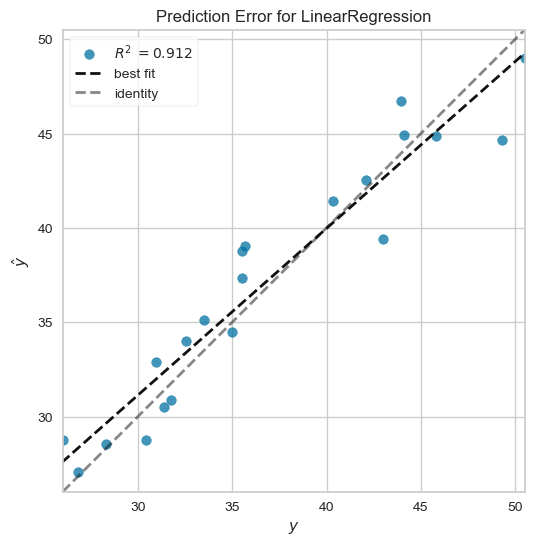

In [61]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = RadViz(size=(600, 600))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

### Check Residuals - Probplot
- https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html
- https://docs.scipy.org/doc/scipy/tutorial/stats/discrete.html


- Quantiles  : Range from any value to any other value.
- Percentiles: Range from 0 to 100.
- Quartiles  : Range from 0 to 4.

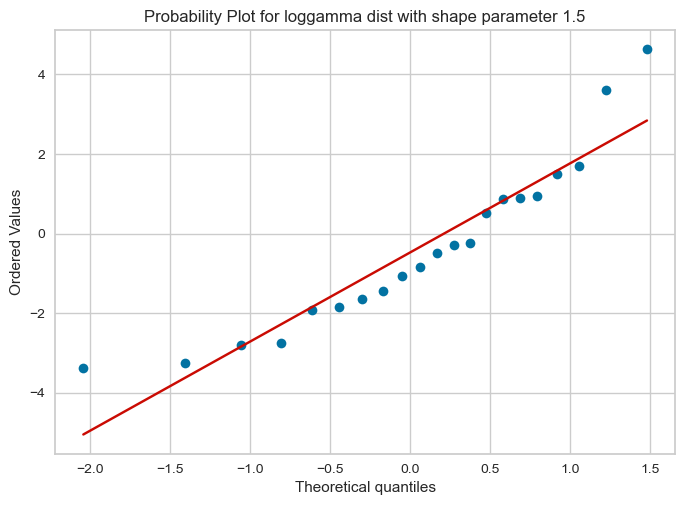

In [62]:
stats.probplot((y_test-y_pred_test), dist=stats.loggamma, sparams=(1.5,), plot=plt);
plt.title("Probability Plot for loggamma dist with shape parameter 1.5");

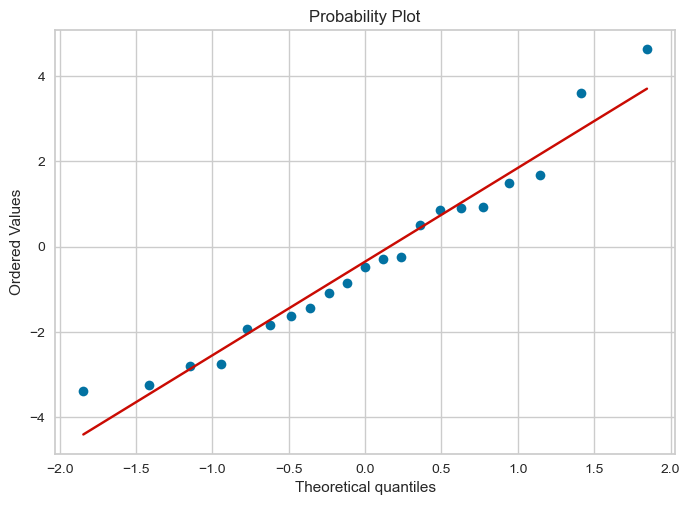

In [63]:
stats.probplot((y_test-y_pred_test), dist=stats.norm, plot=plt);

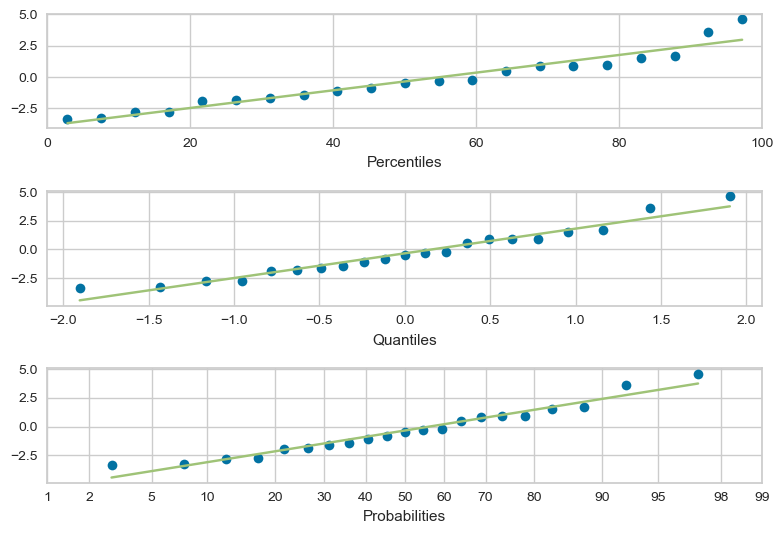

In [64]:
# conda install -c conda-forge mpl-probscale
import probscale

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)

sample = (y_test-y_pred_test)

probscale.probplot(sample, ax=ax1, plottype='pp', bestfit=True, problabel='Percentiles')
probscale.probplot(sample, ax=ax2, plottype='qq', bestfit=True, problabel='Quantiles')
probscale.probplot(sample, ax=ax3, plottype='prob', bestfit=True, problabel='Probabilities')

# ax3.set_xlim(left=0.5, right=99.5)
fig.tight_layout()

In [65]:
# stats.probplot((y_test-y_pred_test_test), dist="norm", plot=plt);
# probscale.probplot(
#     (y_test-y_pred_test_test), plottype='qq', bestfit=True, 
#     problabel='Theoretical Quantiles', probax='x',
#     datalabel='Observed values',
# );

In [66]:
# # stats.probplot((y_test-y_pred_test_test), dist="norm", plot=plt);
# probscale.probplot(
#     (y_test-y_pred_test_test), plottype='pp', bestfit=True, 
#     line_kws=dict(linestyle='--', lw=2, color='k'), 
#     scatter_kws=dict(marker='s', alpha=0.5),
#     problabel='Theoretical Percentiles', probax='x',
#     datalabel='Observed values',
# );

In [67]:
# probscale.probplot(
#     (y_test-y_pred_test_test), plottype='prob', bestfit=True,  
#     line_kws=dict(linestyle='--', linewidth=2),
#     scatter_kws=dict(marker='o', alpha=0.5),
#     problabel='Non-exceedance probability', probax='x',
#     datalabel='Observed values',
# );

## Linear Model Model Fitting and Predicting - with Pipeline and with Scale

In [68]:
from sklearn.linear_model import LinearRegression
# pipeline is used to combine scaler and model
from sklearn.pipeline import Pipeline 

# will be used in pipeline
scaler = StandardScaler() 
lm = LinearRegression() 

# pipeline is used to combine scaler and model
pipe_lm = Pipeline(steps=[ 
    ("scaler", scaler) 
    ,("lm", lm) 
]) 
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [69]:
y_pred_test = pipe_lm.predict(X_test) 
y_pred_train = pipe_lm.predict(X_train) 

### Calculate Manual Actual and Predicted Labels 

In [70]:
# check coeff different after scalar process
get_coeff_intercept(
    pipe_lm.named_steps["lm"].coef_, 
    pipe_lm.named_steps["lm"].intercept_,
    model_name='linear'
)

,Coefficient_linear
Cement,4.280152
Slag,-2.222880
Fly ash,3.932020
Water,-4.770839
SP,0.121100
Coarse Aggr.,-5.277291
Fine Aggr.,-2.611313
SLUMP(cm),-2.188378
FLOW(cm),1.465706
intercept,35.847195


In [71]:
df_comparing.head(2)

,Actual,Prediction,Residual
30,45.82,44.888792,0.931208
67,40.34,41.416085,-1.076085


In [72]:
# Use scaled coeff for scaled data or vice versa
X_test_scaled[0]

array([ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
       -0.20967429,  0.56267018,  0.70678525,  0.65191812])

In [73]:
# Data = not scaled vs scaled 
X_test.loc[30], print(), pd.Series(X_test_scaled[0], index=X.columns)

(Cement          321.0
 Slag              0.0
 Fly ash         164.0
 Water           190.0
 SP                5.0
 Coarse Aggr.    870.0
 Fine Aggr.      774.0
 SLUMP(cm)        24.0
 FLOW(cm)         60.0
 Name: 30, dtype: float64,
 None,
 Cement          1.149349
 Slag           -1.297210
 Fly ash         0.213992
 Water          -0.314141
 SP             -1.217853
 Coarse Aggr.   -0.209674
 Fine Aggr.      0.562670
 SLUMP(cm)       0.706785
 FLOW(cm)        0.651918
 dtype: float64)

In [74]:
# manual calc after scalar process predict
y_test.loc[30], sum(pipe_lm.named_steps["lm"].coef_*X_test_scaled[0]) + pipe_lm.named_steps["lm"].intercept_

(45.82, 44.8887916677886)

In [75]:
# Calc Prediction vs Actual
y_test.loc[30], sum(lin_model.coef_*X_test.loc[30]) + lin_model.intercept_

(45.82, 44.88879166778861)

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [76]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline 

# will be used in pipeline later
scaler = StandardScaler() 

# will be used in pipeline later
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_ridge = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [77]:
y_pred_test = pipe_ridge.predict(X_test)
y_pred_train = pipe_ridge.predict(X_train)

In [78]:
rs = train_val(y_train, y_pred_train, y_test, y_pred_test, "ridge")
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [79]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628


In [80]:
pd.Series(pipe_ridge['ridge'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               None
normalize        deprecated
positive              False
random_state             42
solver                 auto
tol                   0.001
dtype: object

### Ridge Regression Check Cross Validation with alpha : 1

In [81]:
scaler = StandardScaler() 
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("ridge", ridge_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)
df_scores_ridge = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_ridge

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.006967,0.003997,0.945011,-1.837154,-4.419908,-2.102358
1,0.005000,0.002999,0.708681,-2.651491,-10.681426,-3.268245
2,0.004861,0.003001,0.870580,-1.487804,-3.596664,-1.896487
3,0.005002,0.003000,0.920645,-2.255780,-8.710815,-2.951409
4,0.005000,0.003000,0.804676,-2.793295,-11.032516,-3.321523


In [82]:
df_scores_ridge.iloc[:, 2:].mean()

test_r2                             0.849918
test_neg_mean_absolute_error       -2.205105
test_neg_mean_squared_error        -7.688266
test_neg_root_mean_squared_error   -2.708004
dtype: float64

In [83]:
# crosscheck before-after
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [84]:
rm_df = get_coeff_intercept(
    pipe_ridge["ridge"].coef_, 
    pipe_ridge["ridge"].intercept_, 
    model_name=f'ridge_alpha_{pipe_ridge["ridge"].alpha}'
)
rm_df

,Coefficient_ridge_alpha_1
Cement,5.010922
Slag,-1.377652
Fly ash,4.806274
Water,-3.906449
SP,0.261385
Coarse Aggr.,-4.066443
Fine Aggr.,-1.746605
SLUMP(cm),-1.954987
FLOW(cm),1.133500
intercept,35.847195


In [85]:
pd.concat([lm_df, rm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1
Cement,0.054190,5.010922
Slag,-0.036492,-1.377652
Fly ash,0.044675,4.806274
Water,-0.233374,-3.906449
SP,0.041601,0.261385
Coarse Aggr.,-0.060089,-4.066443
Fine Aggr.,-0.041999,-1.746605
SLUMP(cm),-0.243203,-1.954987
FLOW(cm),0.082191,1.133500
intercept,149.990175,35.847195


###  Ridge Regression Choosing Alpha value

In [86]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [87]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline 

alpha_space = np.linspace(0.1, 1, 100)

scaler = StandardScaler() 
ridgecv_model = RidgeCV(
    alphas=alpha_space, 
    scoring= "neg_root_mean_squared_error",
    cv = 10
)
# pipeline is used to combine scaler and model
pipe_ridgecv = Pipeline([
    ("scaler", scaler), 
    ("ridgecv", ridgecv_model)
]) 
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [88]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [89]:
# Ridge( alpha = 0.91)
y_pred_test = pipe_ridgecv.predict(X_test)
y_pred_train = pipe_ridgecv.predict(X_train)

In [90]:
rcs = train_val(y_train, y_pred_train, y_test, y_pred_test, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827


In [91]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827


In [92]:
pd.Series(pipe_ridgecv["ridgecv"].get_params())

alpha_per_target                                                False
alphas              [0.1, 0.1090909090909091, 0.1181818181818182, ...
cv                                                                 10
fit_intercept                                                    True
gcv_mode                                                         None
normalize                                                  deprecated
scoring                                   neg_root_mean_squared_error
store_cv_values                                                 False
dtype: object

In [93]:
rcm_df = get_coeff_intercept(
    pipe_ridgecv["ridgecv"].coef_, 
    pipe_ridgecv["ridgecv"].intercept_, 
    model_name=f'ridgecv_alpha_{pipe_ridgecv["ridgecv"].alpha_}'
)
rcm_df

,Coefficient_ridgecv_alpha_0.9181818181818181
Cement,5.005213
Slag,-1.389454
Fly ash,4.796521
Water,-3.931707
SP,0.258058
Coarse Aggr.,-4.092323
Fine Aggr.,-1.763298
SLUMP(cm),-1.969969
FLOW(cm),1.155002
intercept,35.847195


In [94]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181
Cement,0.054190,5.010922,5.005213
Slag,-0.036492,-1.377652,-1.389454
Fly ash,0.044675,4.806274,4.796521
Water,-0.233374,-3.906449,-3.931707
SP,0.041601,0.261385,0.258058
Coarse Aggr.,-0.060089,-4.066443,-4.092323
Fine Aggr.,-0.041999,-1.746605,-1.763298
SLUMP(cm),-0.243203,-1.954987,-1.969969
FLOW(cm),0.082191,1.133500,1.155002
intercept,149.990175,35.847195,35.847195


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [95]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline 

scaler = StandardScaler() 
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
]) 
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [96]:
y_pred_test = pipe_lasso.predict(X_test)
y_pred_train = pipe_lasso.predict(X_train)

In [97]:
lss = train_val(y_train, y_pred_train, y_test, y_pred_test, "lasso") 
lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [98]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025


In [99]:
pd.Series(pipe_lasso['lasso'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                  0.0001
warm_start            False
dtype: object

### Lasso Regression Cross Validation with Default Alpha : 1

In [100]:
scaler = StandardScaler() 
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
model = Pipeline([
    ("scaler", scaler), 
    ("lasso", lasso_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    cv=5
)
df_scores_lasso = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_lasso

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.007000,0.005995,0.826285,-3.154233,-13.962787,-3.736681
1,0.006000,0.005259,0.499657,-3.387816,-18.345441,-4.283158
2,0.008001,0.005000,0.676319,-2.382057,-8.995287,-2.999214
3,0.008001,0.004998,0.681643,-4.372939,-34.945941,-5.911509
4,0.008034,0.005000,0.736091,-3.244457,-14.906371,-3.860877


In [101]:
df_scores_lasso.iloc[:, 2:].mean()

test_r2                              0.683999
test_neg_mean_absolute_error        -3.308301
test_neg_mean_squared_error        -18.231165
test_neg_root_mean_squared_error    -4.158288
dtype: float64

<AxesSubplot:>

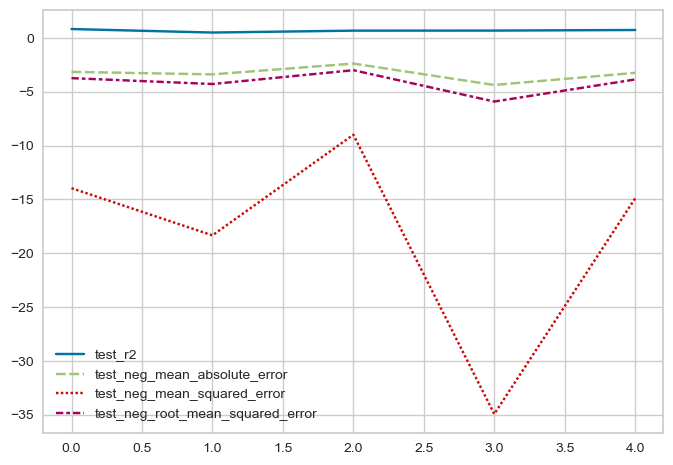

In [102]:
sns.lineplot(data=df_scores_lasso.iloc[:, 2:])

In [103]:
# crosscheck before-after
lss

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [104]:
lsm_df = get_coeff_intercept(
    pipe_lasso["lasso"].coef_, 
    pipe_lasso["lasso"].intercept_, 
    model_name=f'lasso_alpha_{pipe_lasso["lasso"].alpha}'
)
lsm_df

,Coefficient_lasso_alpha_1
Cement,4.821314
Slag,-0.000000
Fly ash,4.880053
Water,-0.819769
SP,0.000000
Coarse Aggr.,-0.351495
Fine Aggr.,-0.000000
SLUMP(cm),-0.710631
FLOW(cm),-0.000000
intercept,35.847195


In [105]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1
Cement,0.054190,5.010922,5.005213,4.821314
Slag,-0.036492,-1.377652,-1.389454,-0.000000
Fly ash,0.044675,4.806274,4.796521,4.880053
Water,-0.233374,-3.906449,-3.931707,-0.819769
SP,0.041601,0.261385,0.258058,0.000000
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631
FLOW(cm),0.082191,1.133500,1.155002,-0.000000
intercept,149.990175,35.847195,35.847195,35.847195


### Lasso Regression choosing  best Alpha value

In [106]:
alpha_space = np.linspace(0.1, 1, 10)
alpha_space

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [107]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline 

scaler = StandardScaler() 
lassocv_model = LassoCV(
    alphas=alpha_space, 
    max_iter=100000, 
    cv=10, 
    random_state=random_state
) 
pipe_lassocv = Pipeline([
    ("scaler", scaler), 
    ("lassocv", lassocv_model)
]) 
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         cv=10, max_iter=100000, random_state=42))])

In [108]:
pipe_lassocv["lassocv"].alpha_

0.1

In [109]:
alpha_space.shape

(10,)

In [110]:
np.where(alpha_space==pipe_lassocv["lassocv"].alpha_)

(array([0], dtype=int64),)

In [111]:
pipe_lassocv["lassocv"].mse_path_[0].mean()

17.12344467865642

In [112]:
y_pred_test = pipe_lassocv.predict(X_test)   
y_pred_train = pipe_lassocv.predict(X_train)

In [113]:
lcs = train_val(y_train, y_pred_train, y_test, y_pred_test, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [114]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184


In [115]:
lcm_df = get_coeff_intercept(
    pipe_lassocv["lassocv"].coef_, 
    pipe_lassocv["lassocv"].intercept_, 
    model_name=f'lassocv_alpha_{pipe_lassocv["lassocv"].alpha_}')
lcm_df

,Coefficient_lassocv_alpha_0.1
Cement,6.360581
Slag,0.000000
Fly ash,6.448608
Water,-2.385571
SP,0.467338
Coarse Aggr.,-2.090038
Fine Aggr.,-0.228233
SLUMP(cm),-1.081774
FLOW(cm),0.000000
intercept,35.847195


In [116]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.1
Cement,0.054190,5.010922,5.005213,4.821314,6.360581
Slag,-0.036492,-1.377652,-1.389454,-0.000000,0.000000
Fly ash,0.044675,4.806274,4.796521,4.880053,6.448608
Water,-0.233374,-3.906449,-3.931707,-0.819769,-2.385571
SP,0.041601,0.261385,0.258058,0.000000,0.467338
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495,-2.090038
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000,-0.228233
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631,-1.081774
FLOW(cm),0.082191,1.133500,1.155002,-0.000000,0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [117]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline 

scaler = StandardScaler() 
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
) 
# pipeline is used to combine scaler and model
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [118]:
y_pred_test = pipe_elastic.predict(X_test)
y_pred_train = pipe_elastic.predict(X_train)

In [119]:
es = train_val(y_train, y_pred_train, y_test, y_pred_test, "elastic")
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [120]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257


In [121]:
pd.Series(pipe_elastic["elastic"].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
l1_ratio                0.5
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state             42
selection            cyclic
tol                  0.0001
warm_start            False
dtype: object

### Elastic_net Regression Check Cross Validation with Default Alpha : 1 and l1_ratio=0.5

In [122]:
scaler = StandardScaler() 
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
) 
model = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
    , cv=5
)
df_scores_elastic = pd.DataFrame.from_dict(scores, orient='columns')
df_scores_elastic

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.007998,0.003000,0.559420,-4.933674,-35.412716,-5.950858
1,0.006003,0.003143,0.466474,-3.311646,-19.562145,-4.422911
2,0.005008,0.003991,0.537252,-3.036801,-12.860032,-3.586089
3,0.007006,0.005036,0.540848,-5.517945,-50.401042,-7.099369
4,0.008225,0.005775,0.625048,-4.116153,-21.178438,-4.602004


In [123]:
df_scores_elastic.iloc[:, 2:].mean()

test_r2                              0.545808
test_neg_mean_absolute_error        -4.183244
test_neg_mean_squared_error        -27.882875
test_neg_root_mean_squared_error    -5.132246
dtype: float64

In [124]:
# crosscheck before-after
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [125]:
dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)

{'alpha': 1, 'l1_ratio': 0.5}

In [126]:
em_df = get_coeff_intercept(
    pipe_elastic["elastic"].coef_, 
    pipe_elastic["elastic"].intercept_, 
    model_name=f'elastic_{dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)}')
em_df

,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
Cement,2.616571
Slag,-0.730153
Fly ash,2.671399
Water,-1.201959
SP,0.000000
Coarse Aggr.,-1.163868
Fine Aggr.,-0.322340
SLUMP(cm),-0.825696
FLOW(cm),-0.000000
intercept,35.847195


In [127]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.1,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
Cement,0.054190,5.010922,5.005213,4.821314,6.360581,2.616571
Slag,-0.036492,-1.377652,-1.389454,-0.000000,0.000000,-0.730153
Fly ash,0.044675,4.806274,4.796521,4.880053,6.448608,2.671399
Water,-0.233374,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959
SP,0.041601,0.261385,0.258058,0.000000,0.467338,0.000000
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696
FLOW(cm),0.082191,1.133500,1.155002,-0.000000,0.000000,-0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195,35.847195


### **Grid Search for ElasticNet for choosing best elastic__alpha - elastic__l1_ratio**

In [128]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [129]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler() 
elastic_model = ElasticNet(
    max_iter=10000, 
    random_state=random_state
) 
# pipeline is used to combine scaler and model
pipe_elastic = Pipeline([
    ("scaler", scaler), 
    ("elastic", elastic_model)
]) 
# define elastic__l1_ratio (0.1, 1)
ratio_space = np.concatenate((np.linspace(0.1, 0.2, 3), np.arange(0.3, 0.8, 0.2), np.linspace(0.9, 1, 3)))
ratio_space
param_grid = {
    "elastic__alpha":alpha_space,
    "elastic__l1_ratio":ratio_space
}
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv =10, 
#     verbose=2,
)

In [130]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': array([0.1 , 0.15, 0.2 , 0.3 , 0.5 , 0.7 , 0.9 , 0.95, 1.  ])},
             scoring='neg_root_mean_squared_error')

In [131]:
y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

In [132]:
gm = train_val(y_train, y_pred_train, y_test, y_pred_test, "elastic_grid")
gm

,elastic_grid_train,elastic_grid_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [133]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184


In [134]:
# pd.Series(grid_model.get_params())

In [135]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}

In [136]:
grid_model.best_score_

-2.741442994105923

In [137]:
grid_model.best_index_

8

In [138]:
egm_df = get_coeff_intercept(
    grid_model.best_estimator_.named_steps['elastic'].coef_, 
    grid_model.best_estimator_.named_steps['elastic'].intercept_, 
    model_name=f'elastic_grid_{grid_model.best_params_}')
egm_df

,"Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
Cement,6.360581
Slag,0.000000
Fly ash,6.448608
Water,-2.385571
SP,0.467338
Coarse Aggr.,-2.090038
Fine Aggr.,-0.228233
SLUMP(cm),-1.081774
FLOW(cm),0.000000
intercept,35.847195


In [139]:
df_coeff = pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, egm_df], axis = 1)
df_coeff

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.9181818181818181,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.1,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}","Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
Cement,0.054190,5.010922,5.005213,4.821314,6.360581,2.616571,6.360581
Slag,-0.036492,-1.377652,-1.389454,-0.000000,0.000000,-0.730153,0.000000
Fly ash,0.044675,4.806274,4.796521,4.880053,6.448608,2.671399,6.448608
Water,-0.233374,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959,-2.385571
SP,0.041601,0.261385,0.258058,0.000000,0.467338,0.000000,0.467338
Coarse Aggr.,-0.060089,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868,-2.090038
Fine Aggr.,-0.041999,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340,-0.228233
SLUMP(cm),-0.243203,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696,-1.081774
FLOW(cm),0.082191,1.133500,1.155002,-0.000000,0.000000,-0.000000,0.000000
intercept,149.990175,35.847195,35.847195,35.847195,35.847195,35.847195,35.847195


#### Grid Search for ElasticNet vs Lasso Result

In [140]:
df_coeff.columns

Index(['Coefficient_linear', 'Coefficient_ridge_alpha_1',
       'Coefficient_ridgecv_alpha_0.9181818181818181',
       'Coefficient_lasso_alpha_1', 'Coefficient_lassocv_alpha_0.1',
       'Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}',
       'Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}'],
      dtype='object')

In [141]:
df_coeff.iloc[:, [4, 6]]

,Coefficient_lassocv_alpha_0.1,"Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
Cement,6.360581,6.360581
Slag,0.000000,0.000000
Fly ash,6.448608,6.448608
Water,-2.385571,-2.385571
SP,0.467338,0.467338
Coarse Aggr.,-2.090038,-2.090038
Fine Aggr.,-0.228233,-0.228233
SLUMP(cm),-1.081774,-1.081774
FLOW(cm),0.000000,0.000000
intercept,35.847195,35.847195


In [142]:
# check difference zero
df_coeff.iloc[:, [4, 6]].diff(axis=1).sum()

Coefficient_lassocv_alpha_0.1                                                 0.0
Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}    0.0
dtype: float64

## **Result:________**

- my model work %100 lasso and alpha: 0.1

# Feature importances

## Feature importances with Ridge

In [143]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

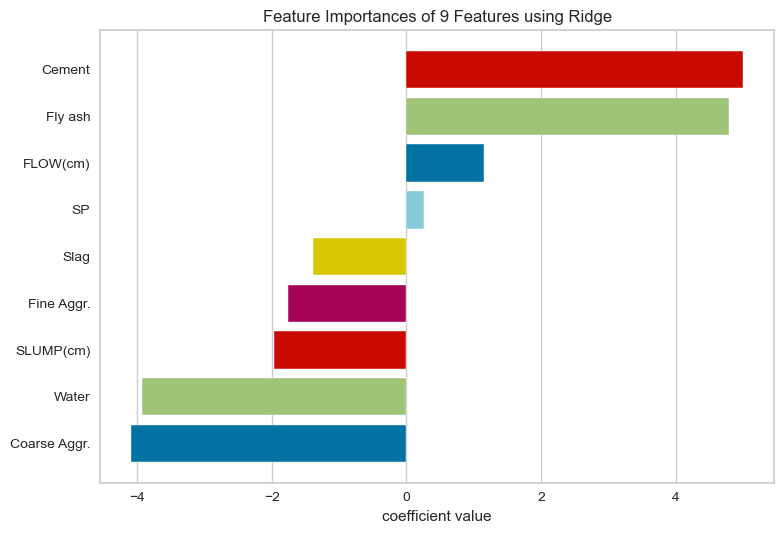

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [144]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## Feature importances with Lasso

In [145]:
pipe_lassocv["lassocv"].alpha_

0.1

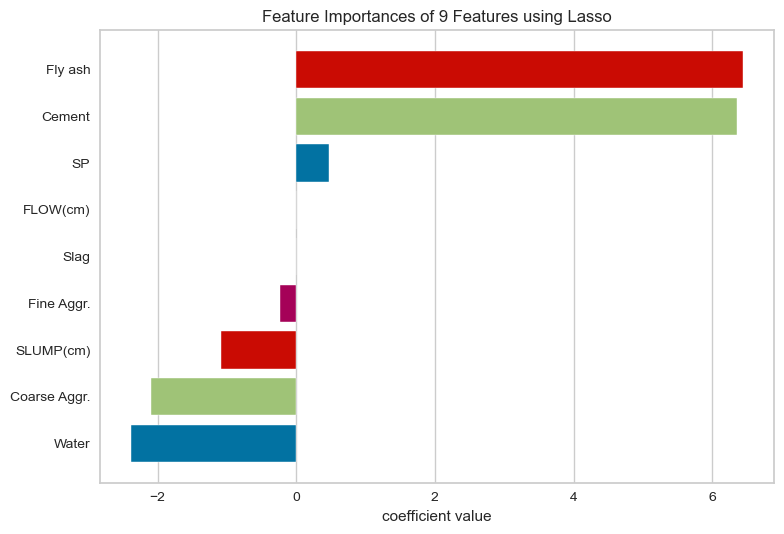

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [146]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns), stack=True, relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

### Feature importances Crosscheck yellowbrick vs Lasso

In [147]:
viz.estimator.alpha

0.1

In [148]:
viz.estimator.l1_ratio

1.0

In [149]:
pd.Series(viz.feature_importances_, index=viz.features_
    ).sort_values(key =abs, ascending=False
    ).to_frame(f'Coefficient_Viz_{viz.estimator}')

,Coefficient_Viz_Lasso(alpha=0.1)
Fly ash,6.448608
Cement,6.360581
Water,-2.385571
Coarse Aggr.,-2.090038
SLUMP(cm),-1.081774
SP,0.467338
Fine Aggr.,-0.228233
Slag,0.000000
FLOW(cm),0.000000


In [150]:
egm_df.sort_values(by=egm_df.columns[0], key =abs, ascending=False)

,"Coefficient_elastic_grid_{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1.0}"
intercept,35.847195
Fly ash,6.448608
Cement,6.360581
Water,-2.385571
Coarse Aggr.,-2.090038
SLUMP(cm),-1.081774
SP,0.467338
Fine Aggr.,-0.228233
Slag,0.000000
FLOW(cm),0.000000


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___